In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data=pd.read_csv('diabetes-dataset.csv')

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
data.rename(columns={'Outcome':'diabetes'}, inplace=True)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
data.shape

(2000, 9)

In [8]:
#check if any null value is present
data.isnull().values.any()

False

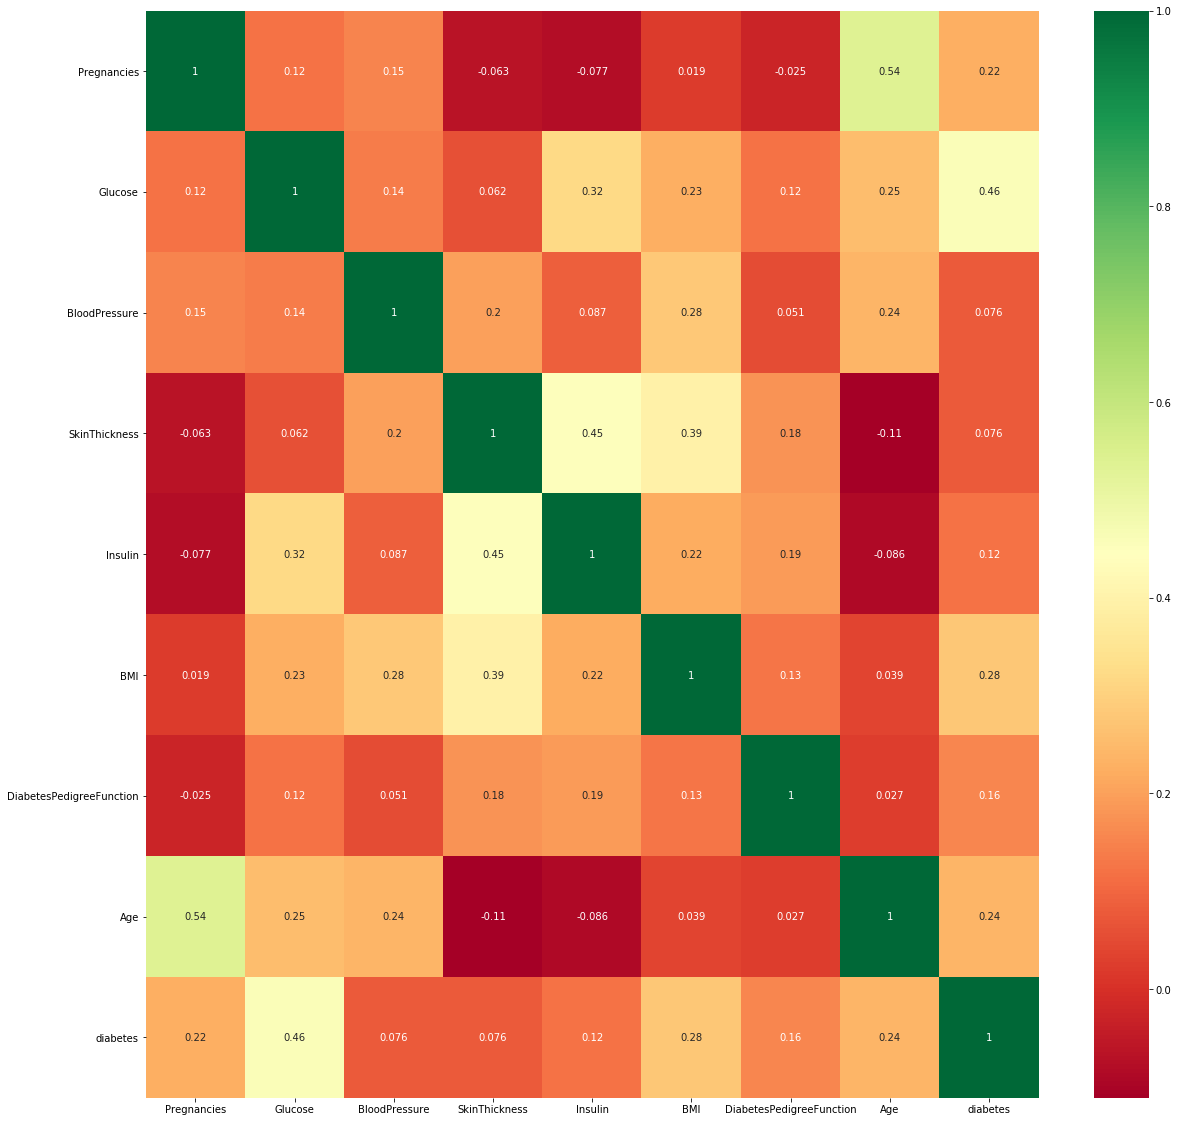

In [9]:
##correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat =  data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
diabetes,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [11]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [12]:
diabetes_true_count,diabetes_false_count

(684, 1316)

In [13]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class = ['diabetes']

In [14]:
x = data[feature_columns].values
y = data[predicted_class].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [15]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies : {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing Glucose : {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure : {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness : {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin : {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI : {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction : {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age : {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 2000
number of rows missing Pregnancies : 301
number of rows missing Glucose : 13
number of rows missing BloodPressure : 90
number of rows missing SkinThickness : 573
number of rows missing Insulin : 956
number of rows missing BMI : 28
number of rows missing DiabetesPedigreeFunction : 0
number of rows missing Age : 0


In [16]:
from sklearn.preprocessing import Imputer
fill_values = Imputer(missing_values=0, strategy='mean',axis=0)

x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [18]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.938


In [19]:
#hyper parameter optization
params={
    'learning_rate'    : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'        : [3,4,5,6,8,10,12,15],
    'min_child_weight' : [1,3,5,7],
    'gamma'            : [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.5,0.7]
    
}

In [20]:
#hyper parameter optimization using randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [21]:
classifier=xgboost.XGBClassifier()


In [22]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [23]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now()  -  start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n time taken: %i hours %i minutes and %s seconds.'% (thour, tmin, round(tsec, 2)))

In [24]:
from datetime import datetime
# here we go 
start_time = timer(None) # timing starts from this point for "start time" variable
random_search.fit(x_train,y_train.ravel())
timer(start_time) # timing ends here for "start time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   10.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.3s finished



 time taken: 0 hours 0 minutes and 11.29 seconds.


In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
       learning_rate=0.2, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [26]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [27]:
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [28]:
y_pred=classifier.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

print(cm)
print(score)

[[354  44]
 [ 48 154]]
0.8466666666666667


In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train.ravel(),cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [31]:
score

array([0.81560284, 0.83687943, 0.86428571, 0.87142857, 0.80714286,
       0.87142857, 0.83571429, 0.87857143, 0.84892086, 0.84172662])

In [32]:
score.mean()

0.8471701180089364

In [34]:
import pickle

In [35]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(random_forest_model, open(filename, 'wb'))